# Linear Regression Project

 We will work with the Ecommerce Customer dataset csv of the company . The dataset consist of the Email Id, Address, color Avatar, Average Session Length, Time on app, Time on website, Length of the membership, Yearly amount spent information of each of the customer. we will perform a Exploratory data analysis and find out the impact of the different numerical features on the yearly amount spent. we  will be performing the Regression analysis and find out the best model for the dataset. Here in this project we will be performing Simple linear Regression, Multiple Linear Regression, Lasso, Ridge and Elastic Net Regression on the Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Ecommerce Customers.csv")

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Checking for null values
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
#checking for the duplicated Values
data.duplicated().sum()

0

In [7]:
#dropping the categorical variable
df=data.drop(["Email","Address","Avatar"],axis=1)

In [8]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [10]:
#descriptive statistics of the dataset
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


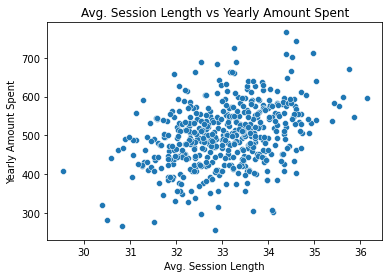

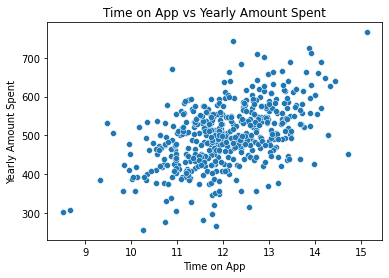

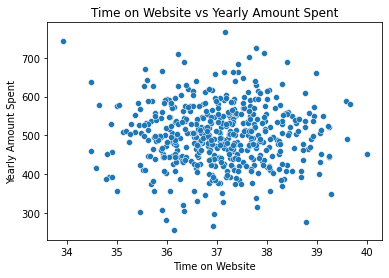

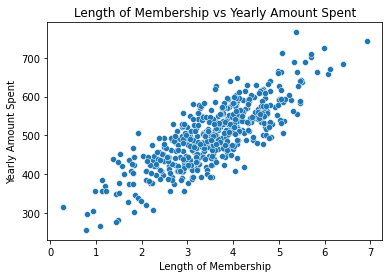

In [11]:
#scatterplot
x_column_names=['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
for i in x_column_names:
  fig=sns.scatterplot(x=i,y="Yearly Amount Spent",data=df)
  fig.set_title(f"{i} vs Yearly Amount Spent")
  plt.show()


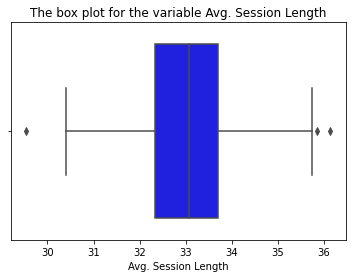

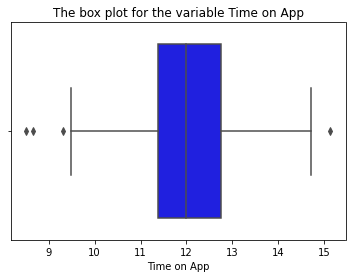

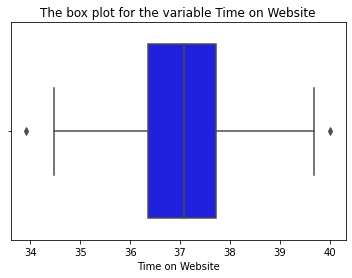

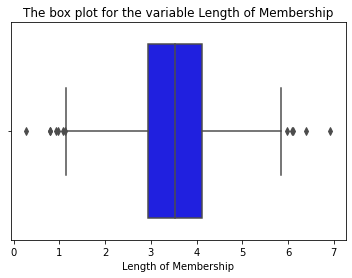

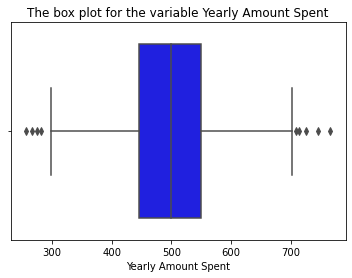

In [12]:
#box plot for each of the features
for i in df.columns:
  fig=sns.boxplot(x=df[i],color='blue')
  fig.set_title(f"The box plot for the variable {i}")
  print("\n")
  plt.show()

In [13]:
# outlier detection
def outlier_detection(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset_outliers=dataset[(dataset[i]<lower_limit) | (dataset[i]>upper_limit)][i].values
  print(f" the outliers in the {i} variable is {dataset_outliers}")

In [14]:
for i in df.columns:
  outlier_detection(df,i)

 the outliers in the Avg. Session Length variable is [29.53242897 36.13966249 35.86023651]
 the outliers in the Time on App variable is [15.12699429  8.50815218  9.3162892   8.66834952]
 the outliers in the Time on Website variable is [40.00518164 33.91384725]
 the outliers in the Length of Membership variable is [5.97676813 6.40122884 6.07665364 6.92268934 0.96862212 0.80151572
 0.78951991 1.0845853  1.13047696 6.11519895 0.9364976  0.26990109]
 the outliers in the Yearly Amount Spent variable is [725.58481406 765.51846194 744.2218671  712.39632681 256.67058229
 282.47124572 266.08634095 708.93518487 275.91842065]


In [15]:
#outlier removal
def outlier_removal(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset=dataset[(dataset[i]>lower_limit) & (dataset[i]<upper_limit)]
  return dataset

In [16]:
for i in df.columns:
  df=outlier_removal(df,i)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
#correlation of the dataset
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


<AxesSubplot:>

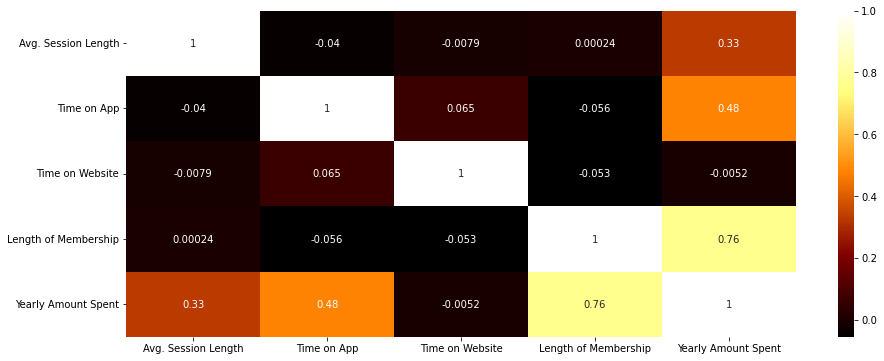

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap="afmhot")

From the heatmap we can notice that their is a less negative or nearly zero correlation between the Time on Website and the Yearly amount Spent.
Their is a high positive correlation between the length of Membership and the yearly amount spent.

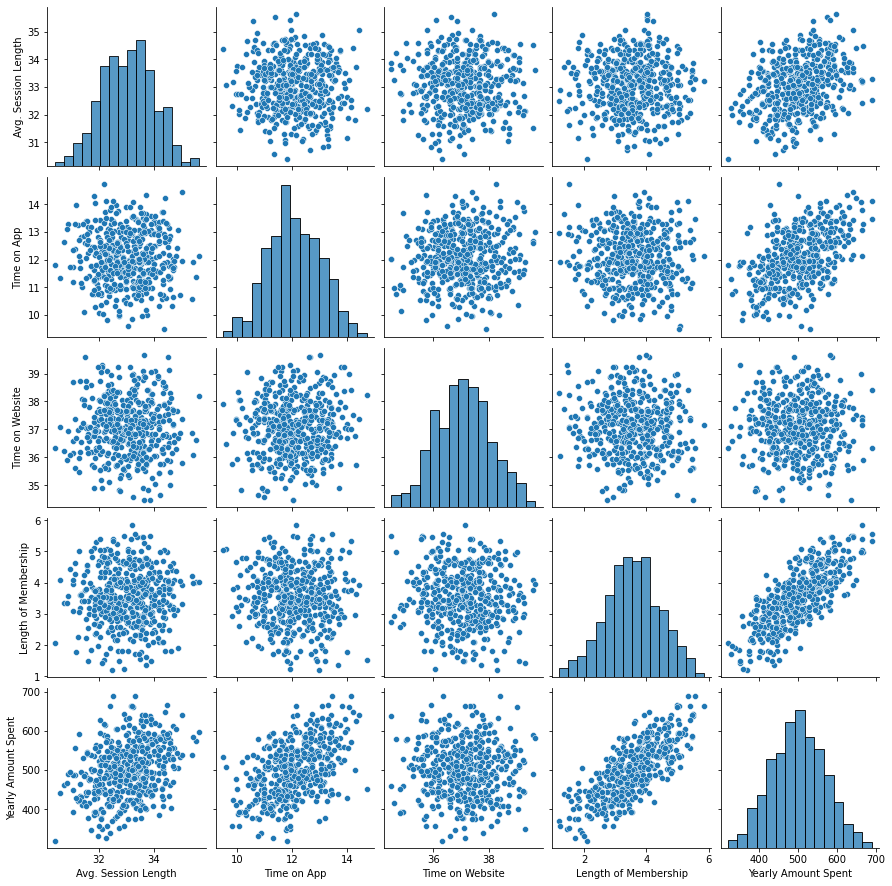

In [19]:
sns.pairplot(df)

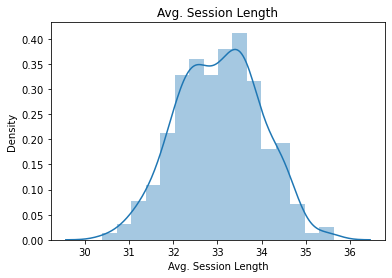

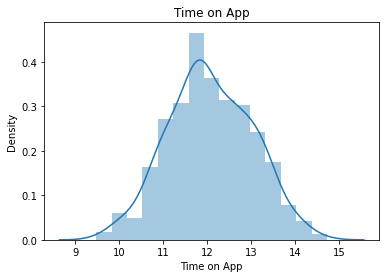

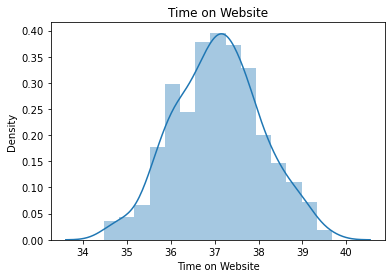

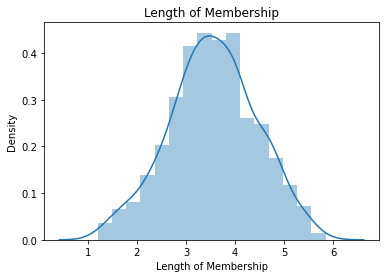

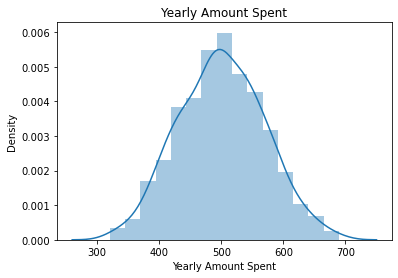

In [20]:
#distplot
for i in df.columns:
    fig=sns.distplot(df[i]);
    fig.set_title(f"{i}")
    plt.show()

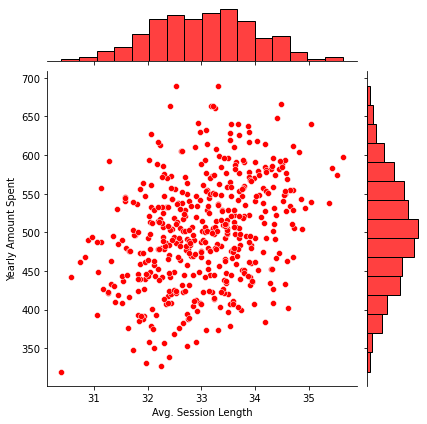

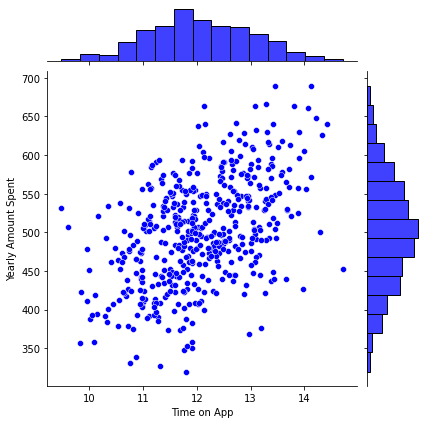

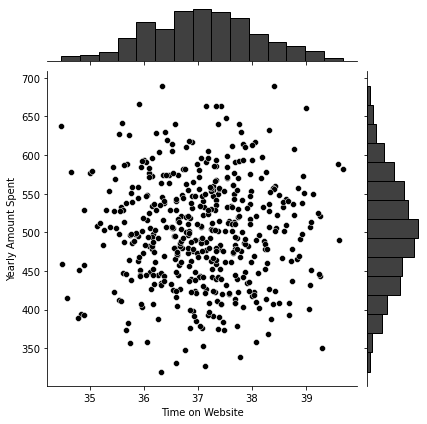

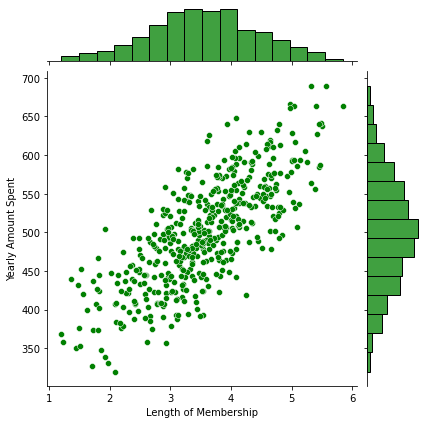

In [21]:
#jointplot
x_column_name = ['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
y_column_name = ['Yearly Amount Spent']
color=["red","blue","black","green"]
for i,j in zip(x_column_name,color):
    sns.jointplot(x=df[i],y=df['Yearly Amount Spent'],color=j)
    plt.show()

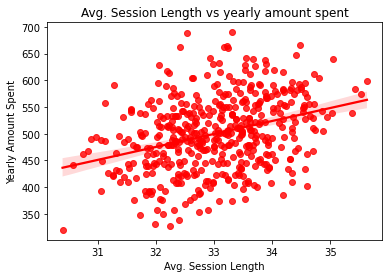

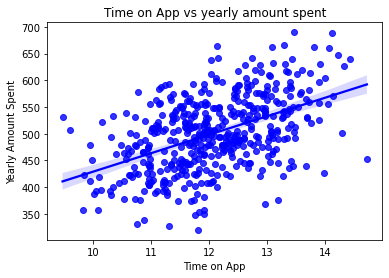

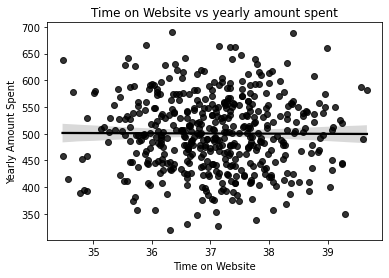

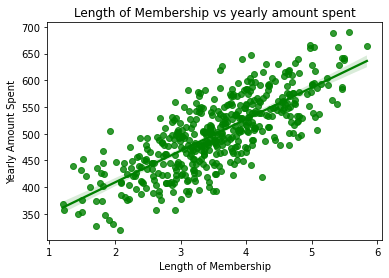

In [22]:
#regplot
for i,j in zip(x_column_name,color):
    sns.regplot(x=df[i],y=df['Yearly Amount Spent'],color=j).set_title(f"{i} vs yearly amount spent")
    plt.show()

## Regression

In [23]:
def data_scaling(xtrain,xtest):
    sc=StandardScaler()
    sc=sc.fit(xtrain)
    scaled_x_train=sc.transform(xtrain)
    scaled_x_test=sc.transform(xtest)
    return scaled_x_train,scaled_x_test


In [24]:
def model(xtrain,xtest,ytrain,ytest,regressor):
    ytrain=ytrain
    ytest=ytest
    lm=regressor
    lm.fit(xtrain,ytrain)
    ypred=lm.predict(xtest)
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    r_square=r2_score(ytest,ypred)
    print('the coefficient of the model is',lm.coef_)
    print('the intercept of the model is',lm.intercept_)
#    print(f"the mae of the {regressor} model is",mae)
    print(f"the mse of the {regressor} model is",mse)
    print(f"the r2 score value of the {regressor} model is",round(r_square*100,4),"%")
    return ypred
    
    

## Simple Linear Regression

In [25]:
x=df["Length of Membership"].values.reshape(-1,1)
y=df["Yearly Amount Spent"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,LinearRegression())


the coefficient of the model is [53.1940894]
the intercept of the model is 502.28287739198663
the mse of the LinearRegression() model is 2224.9132091022434
the r2 score value of the LinearRegression() model is 53.559 %


## Multiple Linear Regression

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,LinearRegression())

the coefficient of the model is [23.92750314 36.60194652 -0.10236278 55.29299795]
the intercept of the model is 502.2828773919866
the mse of the LinearRegression() model is 107.22004269908055
the r2 score value of the LinearRegression() model is 97.762 %


## Lasso Regression

In [34]:
params = {'alpha':np.arange(.01,10,.05)} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params,scoring='r2', cv = 10)
lasso_model.fit(x_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.36000000000000004}
0.9772125941439601


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,Lasso(alpha=0.36000000000000004))

the coefficient of the model is [23.5296618  36.19701288 -0.         54.90557347]
the intercept of the model is 502.2828773919866
the mse of the Lasso(alpha=0.36000000000000004) model is 107.42158032327266
the r2 score value of the Lasso(alpha=0.36000000000000004) model is 97.7578 %


## Ridge Regression

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
params = {'alpha':np.arange(.01,10,.05)}
ridge = Ridge()
ridge_model = GridSearchCV(ridge, params,scoring='r2', cv = 10)
ridge_model.fit(x_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.01}
0.9770492899912794


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,Ridge(alpha=0.01))

the coefficient of the model is [23.9266456  36.60071931 -0.10230391 55.29125541]
the intercept of the model is 502.2828773919866
the mse of the Ridge(alpha=0.01) model is 107.21830728132973
the r2 score value of the Ridge(alpha=0.01) model is 97.762 %


## Elastic Net

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
params = {'alpha':np.arange(.01,10,.05)}
en = ElasticNet()
en_model = GridSearchCV(en, params,scoring='r2', cv = 10)
en_model.fit(x_train, y_train)
print(en_model.best_params_)
print(en_model.best_score_)

{'alpha': 0.01}
0.9769895152081423


In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,ElasticNet(alpha=.01))

the coefficient of the model is [23.78089984 36.39416769 -0.08748901 55.00074416]
the intercept of the model is 502.2828773919866
the mse of the ElasticNet(alpha=0.01) model is 107.06503225135197
the r2 score value of the ElasticNet(alpha=0.01) model is 97.7652 %


# Conclusion

From the Analysis we can notice the following details:

The Elastic Net model preforms well with the dataset with the R2 Score of 97.765%.
The Length of the membership has a high positive correlation with the yearly amount spent. 
The time on website has nearly zero correlation with the yearly amount spent. 
The Time on app and the Average Session length has low positive correlation with the yearly amount spent. 
Their is no mulicollinearity within the independent Variables.
We have identified and removed the outliers from the dataset.
1 unit increase in Avg. Session Length is associated with an increase of 23.78 total dollars yearly amount spent.
1 unit increase in Time on App is associated with an increase of 36.39 total dollars yearly amount spent.
1 unit increase in Time on Website is associated with a decrease of 0.08 total dollars yearly amount spent.
1 unit increase in Length of Membership is associated with an increase of 55.00 total dollars yearly amount spent.
